In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EEG_S1_prestim.csv')

In [3]:
df.head()

,Time (sec),S1 (uV),M1 (uV)
0,0.000,-0.284554,-4.229662
1,0.001,-2.004557,3.565412
2,0.002,-6.181982,2.991061
3,0.003,-1.377149,-1.585859
4,0.004,2.637917,-2.237438


In [8]:
df.shape

(2000, 3)

Close figure to quit


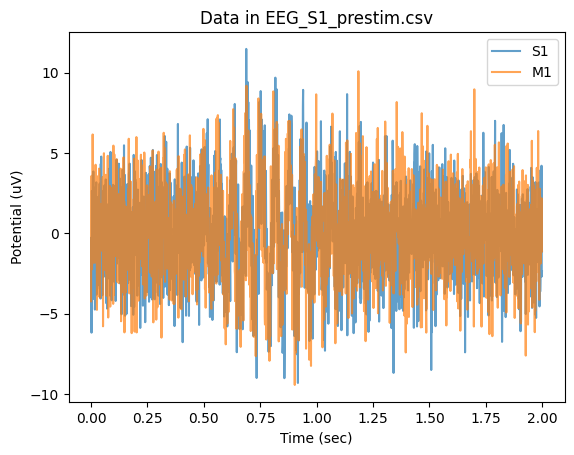

In [18]:
import display_data
%run -i display_data

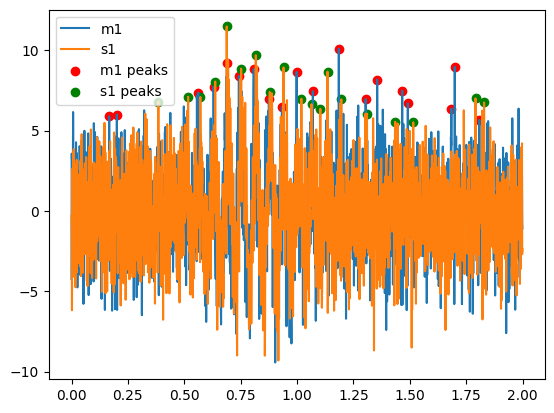

In [104]:
# Find the (non-trivial) peaks of the waveform

# import scipy to use find_peaks
import scipy

# convert df to numpy array
arr = df.to_numpy()

# extract peaks
peaks_m1 = scipy.signal.find_peaks(arr[:,2], prominence=12)
peaks_s1 = scipy.signal.find_peaks(arr[:,1], prominence=12)

# graph
plt.plot(arr[:,0], arr[:,2], label='m1')
plt.plot(arr[:,0], arr[:,1], label='s1')
plt.scatter(arr[peaks_m1[0], 0], arr[peaks_m1[0],2], c='r', label='m1 peaks')
plt.scatter(arr[peaks_s1[0], 0], arr[peaks_s1[0],1], c='g', label='s1 peaks')
plt.legend()
plt.show()


In [87]:
# Find the frequency of the oscillating part of the waveform

# Break waves just into osciallting intervals based on peaks
m1_osc = arr[:,[0,2]][peaks_m1[0]]
s1_osc = arr[:,[0,1]][peaks_s1[0]]

# calculate difference in t
m1_diff = np.diff(m1_osc[:,0])
s1_diff = np.diff(s1_osc[:,0])

# calculate average time between peaks
m1_avg_t = np.mean(m1_diff)
s1_avg_t = np.mean(s1_diff)

# divide 1 by average time
m1_freq = 1/(m1_avg_t)
s1_freq = 1/(s1_avg_t)

# print
print('M1 frequency: ', m1_freq)
print('S1 frequency: ', s1_freq)

print(m1_osc[:,0].shape)
print(s1_osc[:,0].shape)

M1 frequency:  4.9504950495049505
S1 frequency:  11.185682326621924
(6,)
(6,)


In [85]:
# Find the delay (latency) between the M1 and S1 signals

# Define the threshold for closeness
threshold = 0.1

# Find indices where the values are close
close_indices = np.abs(m1_osc[:,1] - s1_osc[:,1]) <= threshold

# Select values from both arrays where the condition is met
m1_close = m1_osc[close_indices]
s1_close = s1_osc[close_indices]

print(np.mean(np.abs(m1_close[:,0]-s1_close[:,0])))

nan
